# Prediksi Status Pengiriman Barang Menggunakan Metode Decision Tree

Import Library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Eksplorasi Data

Load Dataset

In [24]:
# Import Dataset
df = pd.read_csv('shipping_ecommerce.csv')
df

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1
...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,F,Road,medium,M,1
10994,4,1,5,48,2399,D,Flight,low,M,1
10995,3,2,10,25,1548,F,Ship,medium,M,1
10996,3,1,3,11,2194,F,Flight,medium,M,1


Melihat dimensi dataset

In [25]:
df.shape

(10998, 10)

Mempelajari informasi setiap atribut

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10998 non-null  int64 
 1   Customer_rating      10998 non-null  int64 
 2   Prior_purchases      10998 non-null  int64 
 3   Discount_offered     10998 non-null  int64 
 4   Weight_in_gms        10998 non-null  int64 
 5   Warehouse_block      10998 non-null  object
 6   Mode_of_Shipment     10998 non-null  object
 7   Product_importance   10998 non-null  object
 8   Gender               10998 non-null  object
 9   Class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


Statistika deskriptif pada dataset

In [27]:
df.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


Persebaran label target di dataset

In [28]:
df['Class'].value_counts()

Class
1    6563
0    4435
Name: count, dtype: int64

Distribusi untuk kolom: Customer_care_calls
Customer_care_calls
4    3557
3    3216
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64




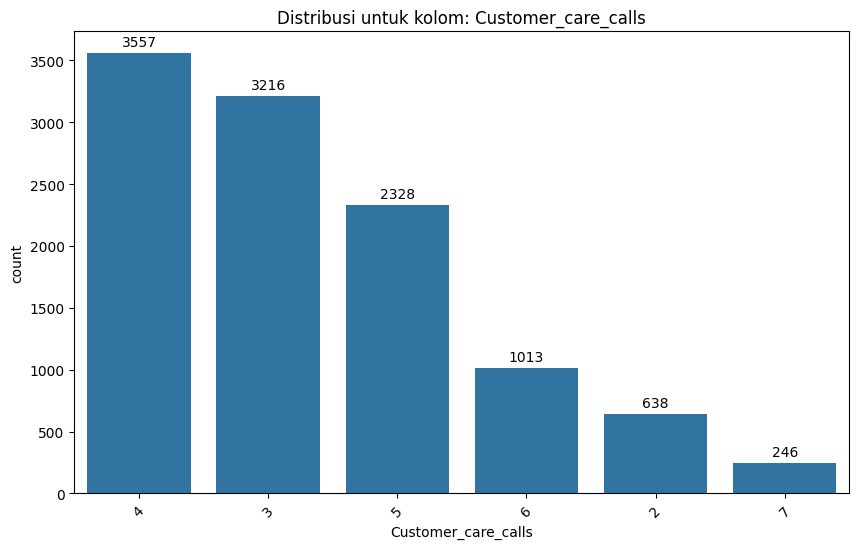

Distribusi untuk kolom: Customer_rating
Customer_rating
3    2239
1    2235
4    2188
5    2171
2    2165
Name: count, dtype: int64




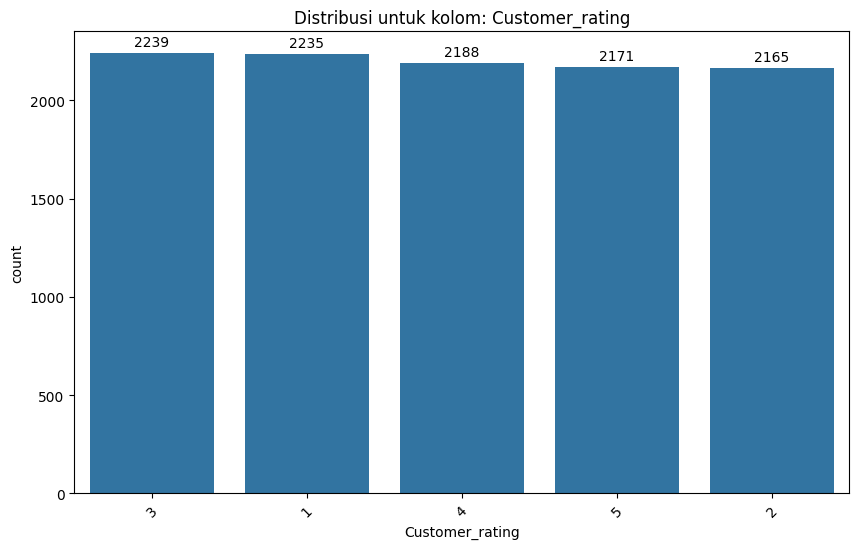

Distribusi untuk kolom: Prior_purchases
Prior_purchases
3     3955
2     2599
4     2154
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64




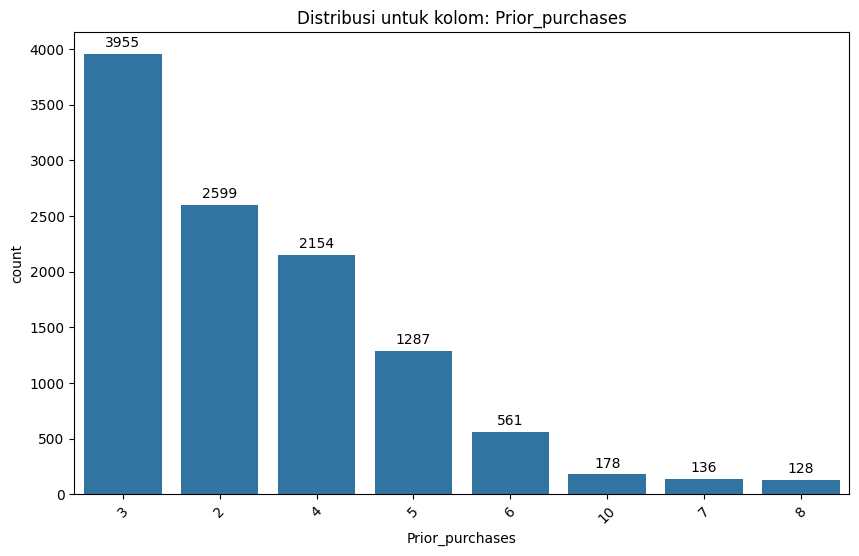

Distribusi untuk kolom: Warehouse_block
Warehouse_block
F    3666
D    1834
B    1833
C    1833
A    1832
Name: count, dtype: int64




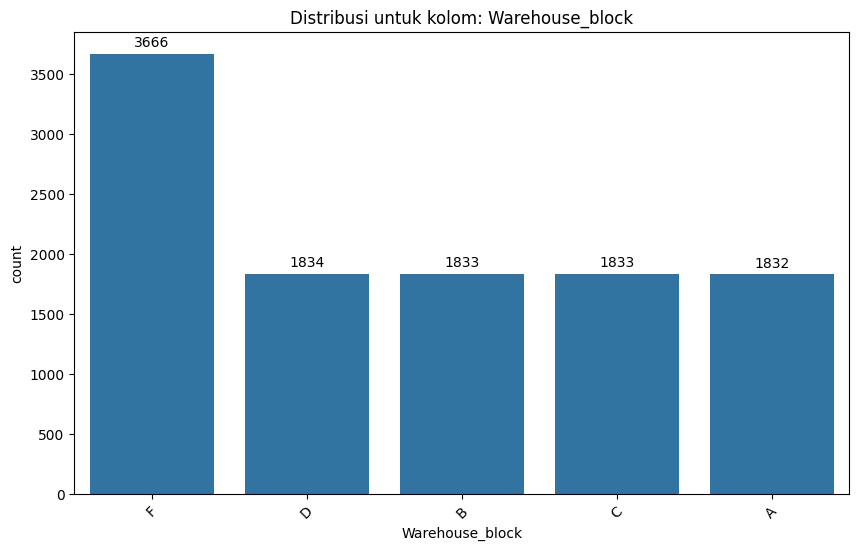

Distribusi untuk kolom: Mode_of_Shipment
Mode_of_Shipment
Ship      7461
Flight    1777
Road      1760
Name: count, dtype: int64




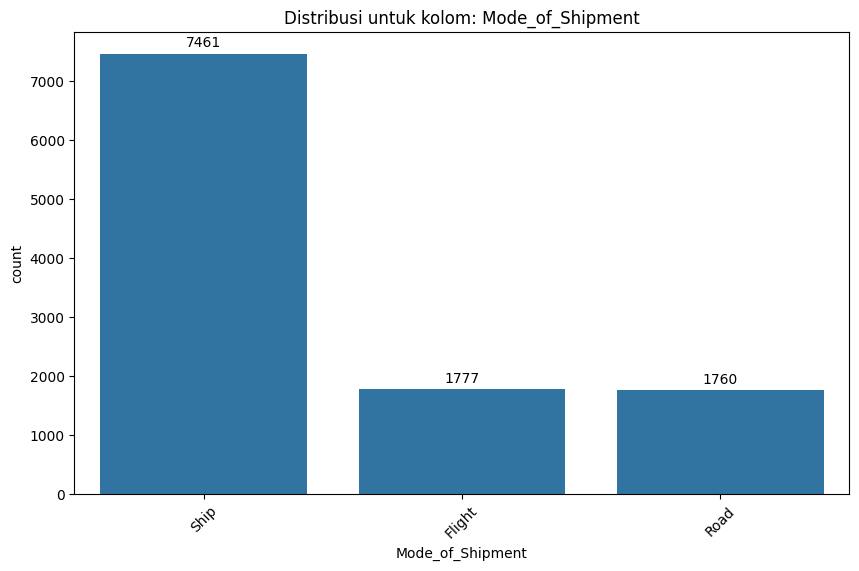

Distribusi untuk kolom: Product_importance
Product_importance
low       5296
medium    4754
high       948
Name: count, dtype: int64




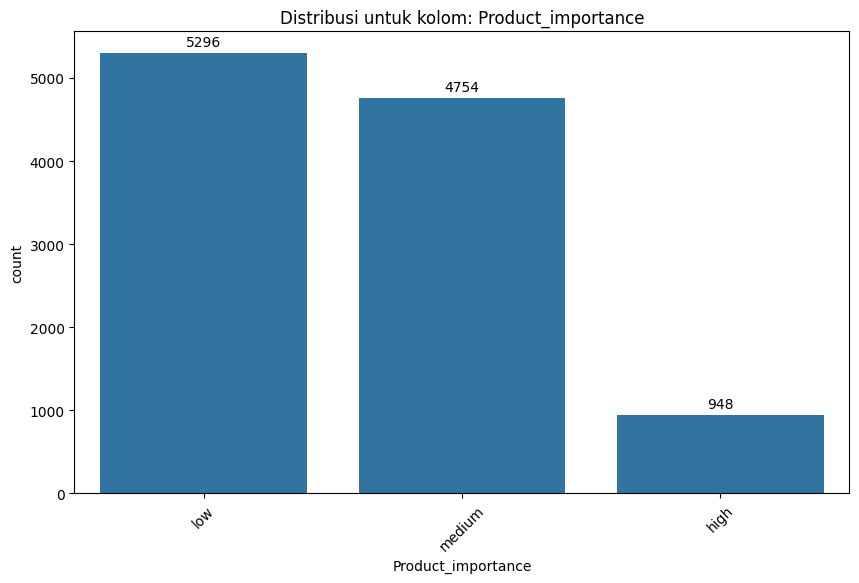

Distribusi untuk kolom: Gender
Gender
F    5544
M    5454
Name: count, dtype: int64




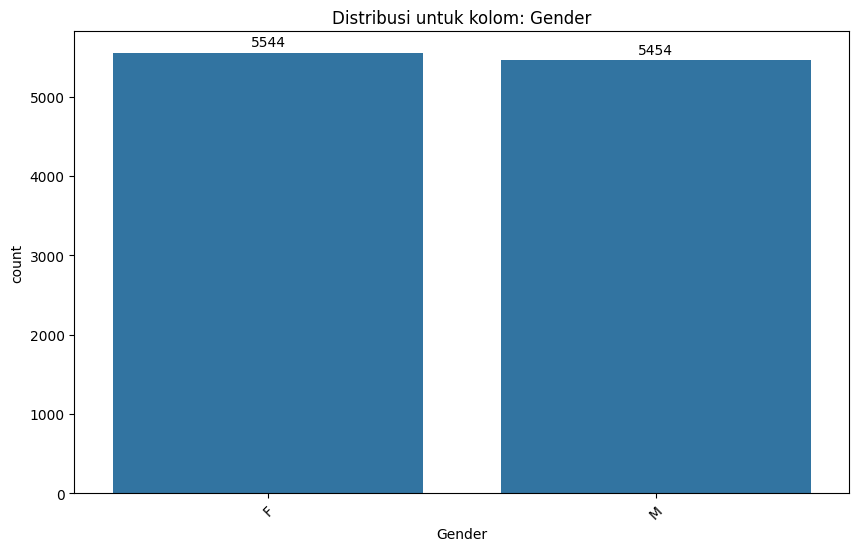

Distribusi untuk kolom: Class
Class
1    6563
0    4435
Name: count, dtype: int64




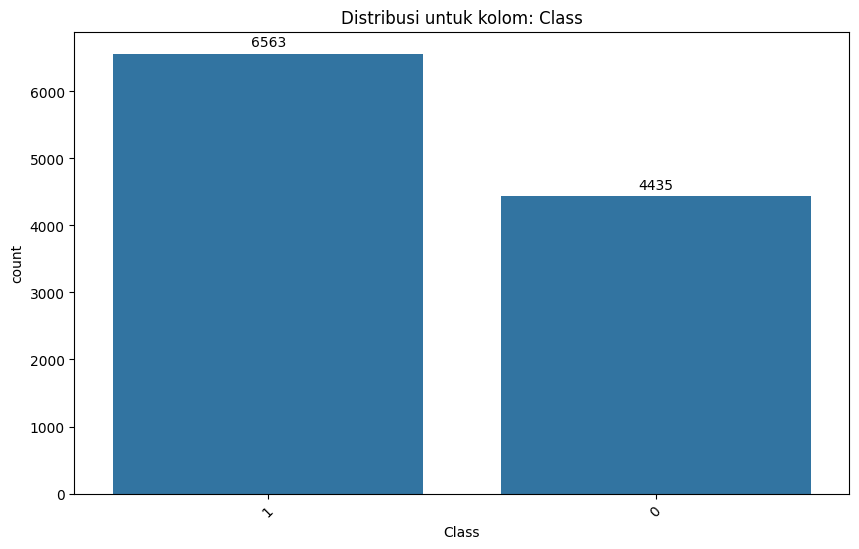

In [29]:
for col in df.columns:
    if col == "Weight_in_gms" or col == "Discount_offered":
        continue
    
    print(f"Distribusi untuk kolom: {col}")
    print(df[col].value_counts())
    print("\n")
    
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi untuk kolom: {col}')
    plt.xticks(rotation=45)

    # Menambahkan angka di atas bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.show()

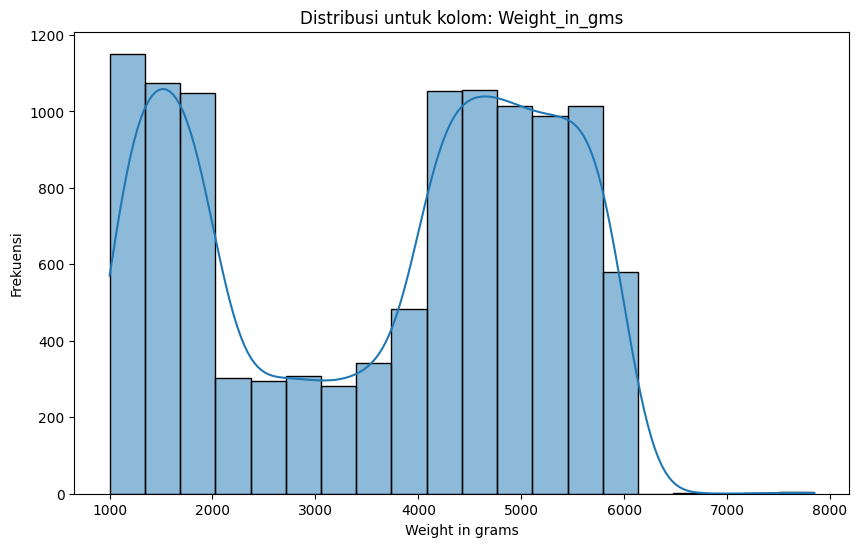

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight_in_gms'], bins=20, kde=True)
plt.title('Distribusi untuk kolom: Weight_in_gms')
plt.xlabel('Weight in grams')
plt.ylabel('Frekuensi')
plt.show()

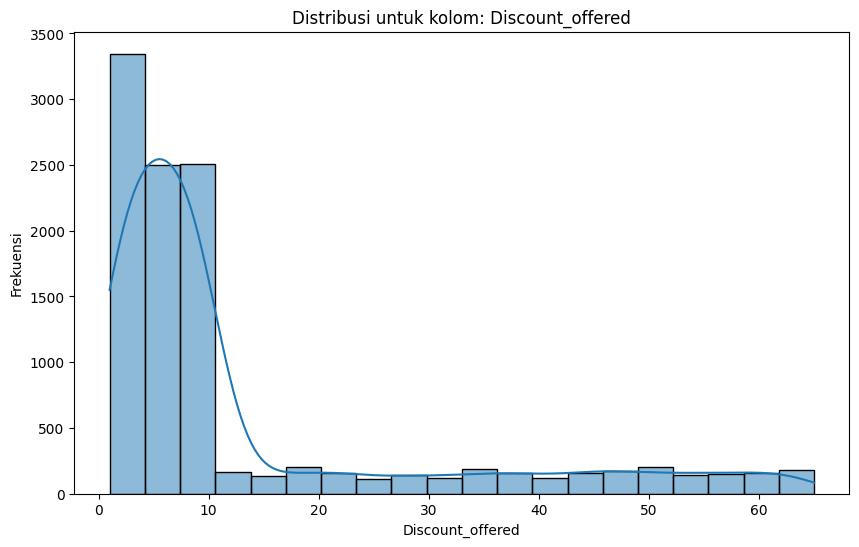

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount_offered'], bins=20, kde=True)
plt.title('Distribusi untuk kolom: Discount_offered')
plt.xlabel('Discount_offered')
plt.ylabel('Frekuensi')
plt.show()

## Data Preprocessing

Mengubah data bertipe kategorikal menjadi numerikal

In [32]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for column in categorical_columns:
    df[column], uniques = pd.factorize(df[column])
    label_encoders[column] = uniques


# Menampilkan dictionary label_encoders
label_encoders

{'Warehouse_block': Index(['A', 'F', 'D', 'B', 'C'], dtype='object'),
 'Mode_of_Shipment': Index(['Ship', 'Road', 'Flight'], dtype='object'),
 'Product_importance': Index(['medium', 'low', 'high'], dtype='object'),
 'Gender': Index(['M', 'F'], dtype='object')}

In [33]:
# Menampilkan DataFrame yang telah diencode
df

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,0,0,0,0,1
1,4,3,2,6,5867,1,0,0,1,0
2,3,4,2,2,5957,2,0,0,0,0
3,3,1,2,27,2551,2,0,0,0,1
4,7,5,4,9,1329,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,1,1,0,0,1
10994,4,1,5,48,2399,2,2,1,0,1
10995,3,2,10,25,1548,1,0,0,0,1
10996,3,1,3,11,2194,1,2,0,0,1


Mencari korelasi antar atribut

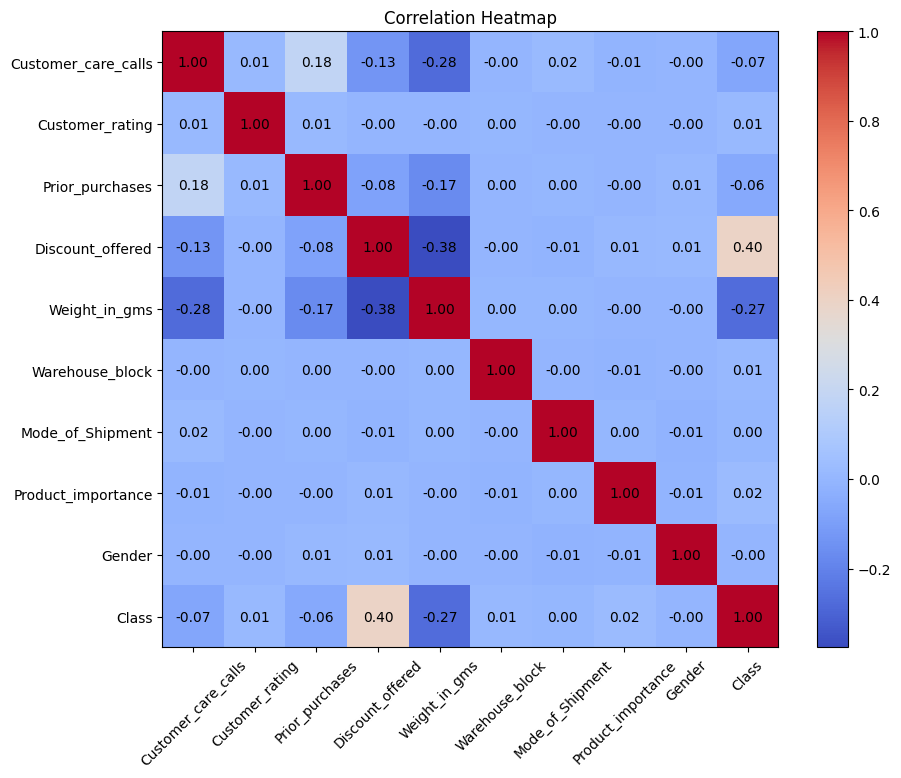

In [34]:
def mean(data):
    return np.mean(data)

def pearson_correlation(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

def correlation_matrix(data):
    num_features = data.shape[1]
    corr_matrix = np.zeros((num_features, num_features))
    for i in range(num_features):
        for j in range(i, num_features):
            corr_value = pearson_correlation(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = corr_value
            corr_matrix[j, i] = corr_value
    return corr_matrix

def plot_heatmap(corr_matrix, columns):
    plt.figure(figsize=(10, 8))
    heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

    plt.colorbar(heatmap)
    plt.title('Correlation Heatmap')
    plt.xticks(np.arange(len(columns)), columns, rotation=45)
    plt.yticks(np.arange(len(columns)), columns)

    # Menambahkan annotasi angka di dalam persegi heatmap
    for i in range(len(columns)):
        for j in range(len(columns)):
            plt.text(j, i, format(corr_matrix[i, j], ".2f"), ha="center", va="center", color="black")

    plt.show()


# Menghitung matriks korelasi
corr_matrix = correlation_matrix(df)

# Menampilkan heatmap
plot_heatmap(corr_matrix, df.columns)

Jadi, atribut Discount_offered, Product_importance, dan Customer_rating memiliki dampak yang paling signifikan terhadap variabel target Class

### Membuat Model Decision Tree

Memisahkan semua atribut pendukung dan label target

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat class DecisionTree untuk menampung beberapa fungsi yang diperlukan

In [36]:
class DecisionTree:
    # Inisialisasi DecisionTree dengan parameter minimum sampel untuk split dan maksimum kedalaman pohon
    def __init__(self, min_samples_split=2, max_depth=100, feature_names=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None
        self.feature_names = feature_names

    # Melatih model DecisionTree menggunakan data train
    def fit(self, X, y):
        data = np.array(X, dtype=np.float64)
        label = np.array(y, dtype=np.int64)
        self.tree = self.grow_tree(data, label) # membangun tree
    
    # Fungsi rekursif untuk membangun tree
    def grow_tree(self, data, label, depth=0):
        num_samples, num_features = data.shape
        unique_label = np.unique(label)
        
        # Kondisi berhenti
        if(len(unique_label) == 1 or num_samples < self.min_samples_split or depth >= self.max_depth):
            leaf_value = self.most_common_label(label)
            return {'leaf': True, 'value': leaf_value, 'entropy': self.entropy(label)}

        # Mencari feature dan threshold terbaik untuk split
        best_feature, best_threshold = self.best_split(data, label, num_features)

        # Mendapatkan indeks sampel di setiap cabang
        left_indices = data[:, best_feature] <= best_threshold
        right_indices = data[:, best_feature] > best_threshold

        # Membangun masing-masing cabang secara rekursif
        left_subtree = self.grow_tree(data[left_indices], label[left_indices], depth + 1)
        right_subtree = self.grow_tree(data[right_indices], label[right_indices], depth + 1)

        # Mengembalikan node dengan informasi split dan entropi
        return {'leaf': False, 'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree, 'entropy': self.entropy(label)}

    # Fungsi untuk menemukan fitur dan threshold terbaik untuk split
    def best_split(self, data, labels, num_features):
        best_gain = -1
        best_feature, best_threshold = None, None

        # Perulangan untuk semua fitur yang ada
        for feature in range(num_features):
            thresholds = np.unique(data[:, feature])
            for threshold in thresholds:
                gain = self.information_gain(data, labels, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    # Fungsi untuk menghitung information gain
    def information_gain(self, data, labels, feature, threshold):
        parent_entropy = self.entropy(labels)

        # Mendapatkan indeks sampel untuk setiap cabang
        left_indices = data[:, feature] <= threshold
        right_indices = data[:, feature] > threshold

        # Mengembalikan gain sebesar 0 jika salah satu cabang tidak memiliki sampel
        if len(labels[left_indices]) == 0 or len(labels[right_indices]) == 0:
            return 0

        # Menghitung entropi di setiap cabang
        left_entropy = self.entropy(labels[left_indices])
        right_entropy = self.entropy(labels[right_indices])

        # Menghitung jumlah sampel di setiap cabang
        num_left = len(labels[left_indices])
        num_right = len(labels[right_indices])
        num_total = len(labels)
        
        # Menghitung information gain
        weighted_avg_entropy = (num_left / num_total) * left_entropy + (num_right / num_total) * right_entropy
        gain = parent_entropy - weighted_avg_entropy

        return gain

    # Fungsi untuk menghitung entropi
    def entropy(self, labels):
        probabilities = np.bincount(labels) / len(labels) # menghitung probabilitas masing-masing label
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    # Fungsi untuk menemukan label yang paling sering muncul
    def most_common_label(self, labels):
        return np.bincount(labels).argmax() # mencari frekuensi setiap elemen dengan mengembalikan index elemen tersebut

    # Fungsi untuk memprediksi label pada data baru
    def predict(self, X):
        data = np.array(X, dtype=np.float64)
        return np.array([self.predict_single(inputs) for inputs in data]) # mengembalikan prediksi untuk setiap sampel pada data

    # Fungsi untuk memprediksi label untuk satu sampel data
    def predict_single(self, inputs):
        node = self.tree
        # Perulangan sampai mencapai leaf
        while not node['leaf']:
            if inputs[node['feature']] <= node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node['value']

    # Fungsi untuk mencetak tree secara visual dengan lebih singkat
    def print_tree(self, node=None, spacing="", is_left=True):
        if node is None:
            node = self.tree

        if node['leaf']:
            print(f"{spacing}└── Predict: {node['value']} (Entropy: {node['entropy']:.4f})")
            return

        feature_name = self.feature_names[node['feature']] if self.feature_names else f"Feature {node['feature']}"
        if is_left:
            prefix = "├── "
        else:
            prefix = "└── "

        print(f"{spacing}{prefix}{feature_name} <= {node['threshold']:.2f} (Entropy: {node['entropy']:.4f})")

        spacing_child = spacing + "│   "
        self.print_tree(node['left'], spacing_child, is_left=True)
        self.print_tree(node['right'], spacing_child, is_left=False)


# Fungsi untuk menghitung akurasi prediksi
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


def dynamic_input(feature_names):
        inputs = []
        for feature in feature_names:
            value = int(input(f"Masukkan nilai untuk {feature}: "))
            inputs.append(value)
        input_dict = dict(zip(feature_names, inputs))
        return np.array(inputs).reshape(1, -1), input_dict


tree = DecisionTree(min_samples_split=7, max_depth=6, feature_names=df.columns.tolist())
tree.fit(X_train, y_train)

# Prediksi
y_pred = tree.predict(X_test)
print(f'Predictions: {y_pred}')

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}')

Predictions: [1 0 0 ... 0 0 0]
Accuracy: 67.5909090909091


## Visualisasi Tree

In [37]:
# Menampilkan tree
tree.print_tree()

├── Discount_offered <= 10.00 (Entropy: 0.9737)
│   ├── Weight_in_gms <= 4126.00 (Entropy: 0.9970)
│   │   ├── Prior_purchases <= 3.00 (Entropy: 0.9888)
│   │   │   ├── Weight_in_gms <= 3995.00 (Entropy: 0.7705)
│   │   │   │   ├── Weight_in_gms <= 1996.00 (Entropy: 0.4369)
│   │   │   │   │   ├── Customer_care_calls <= 4.00 (Entropy: 0.6460)
│   │   │   │   │   │   └── Predict: 1 (Entropy: 0.4968)
│   │   │   │   │   │   └── Predict: 1 (Entropy: 0.9678)
│   │   │   │   │   └── Predict: 1 (Entropy: -0.0000)
│   │   │   │   └── Customer_rating <= 2.00 (Entropy: 0.9936)
│   │   │   │   │   ├── Weight_in_gms <= 4002.00 (Entropy: 0.9945)
│   │   │   │   │   │   └── Predict: 0 (Entropy: -0.0000)
│   │   │   │   │   │   └── Predict: 0 (Entropy: 0.9977)
│   │   │   │   │   └── Discount_offered <= 2.00 (Entropy: 0.9604)
│   │   │   │   │   │   └── Predict: 1 (Entropy: 0.6500)
│   │   │   │   │   │   └── Predict: 1 (Entropy: 0.9887)
│   │   │   └── Weight_in_gms <= 1990.00 (Entropy: 0.9997)
│  

## Perbandingan Model Decision Tree dengan Model Klasifikasi Lainnya

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold,cross_val_score
from lightgbm import LGBMClassifier

catboost = CatBoostClassifier(verbose=False)
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
xgboost = XGBClassifier()
adaboost = AdaBoostClassifier()
mlp = MLPClassifier()
lgb = LGBMClassifier()

models = [random_forest, logistic_regression, svm, knn, naive_bayes, xgboost, adaboost, catboost, lgb]


In [39]:

def eval_model(model):
    cv = KFold(n_splits=7)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X, y, cv=cv, scoring='accuracy') * 100
    eval_df.loc[len(eval_df)] = [str(model), score.mean()]



In [40]:
eval_df = pd.DataFrame(columns=['Model', 'Cross Validated Accuracy'],index=None)

for model in models:
    eval_model(model)

eval_df

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 5236, number of negative: 3562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 8798, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.595135 -> initscore=0.385236
[LightGBM] [Info] Start training from score 0.385236
[LightGBM] [Info] Number of positive: 5606, number of negative: 3820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 9426, number of used features: 9
[LightGBM] [Info] [binary:Boos

,Model,Cross Validated Accuracy
0,RandomForestClassifier(),65.766554
1,LogisticRegression(),63.466222
2,SVC(),66.266748
3,KNeighborsClassifier(),63.811620
4,GaussianNB(),64.893652
5,"XGBClassifier(base_score=None, booster=None, c...",65.511899
6,AdaBoostClassifier(),67.539667
7,<catboost.core.CatBoostClassifier object at 0x...,66.612205
8,LGBMClassifier(),66.157576


In [41]:
from sklearn.metrics import accuracy_score, f1_score

naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
score = accuracy_score(y_pred, y_test) * 100
print("Test dataset for naive_bayes: ", score)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = accuracy_score(y_pred, y_test) * 100
print("Test dataset for svc: ", score)

adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
score = accuracy_score(y_pred, y_test) * 100
print("Test dataset for adaboost: ", score)

Test dataset for naive_bayes:  64.63636363636364
Test dataset for svc:  65.86363636363637
Test dataset for adaboost:  66.27272727272727


## Melakukan Prediksi Terhadap Data Input Secara Dinamis untuk Setiap Atribut

In [42]:
df.tail()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
10993,3,5,3,1,5024,1,1,0,0,1
10994,4,1,5,48,2399,2,2,1,0,1
10995,3,2,10,25,1548,1,0,0,0,1
10996,3,1,3,11,2194,1,2,0,0,1
10997,4,3,3,8,3318,3,0,0,0,1


In [43]:
# Input data dinamis untuk prediksi
print("Input data baru untuk prediksi:")
feature_names = df.drop(columns=['Class']).columns.tolist()
new_data, input_dict = dynamic_input(feature_names)
new_prediction = tree.predict(new_data)
print(f'Input parameter: {input_dict}')
print(f'Prediksi untuk data baru: {new_prediction[0]}')


Input data baru untuk prediksi:
Input parameter: {'Customer_care_calls': 3, 'Customer_rating': 1, 'Prior_purchases': 3, 'Discount_offered': 11, 'Weight_in_gms': 2194, 'Warehouse_block': 1, 'Mode_of_Shipment': 2, 'Product_importance': 0, 'Gender': 0}
Prediksi untuk data baru: 1
